In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial

In [3]:
#Lines from the excel
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visible range\valores_VIS.xlsx")
Spatial_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Spatial range\valores_Spatial.xlsx")


In [4]:
#separate for color range, make a list
values_VIS = [ VIS_data[VIS_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

values_spatial = [Spatial_data[Spatial_data['Lambda observed'].between(3800, 4270, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4270, 4760, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4760, 4970, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(4970, 5700, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5700, 5810, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(5810, 6180, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(6180, 7800, inclusive='neither')],
                Spatial_data[Spatial_data['Lambda observed'].between(7800, 11000, inclusive='neither')]
]

In [39]:
#colors for the plot
colors = ['violet','blue','cyan','green','yellow','orange','red','brown']
colors_fit = ['darkviolet','darkblue','darkcyan','darkgreen','gold','darkorange','darkred','sienna']

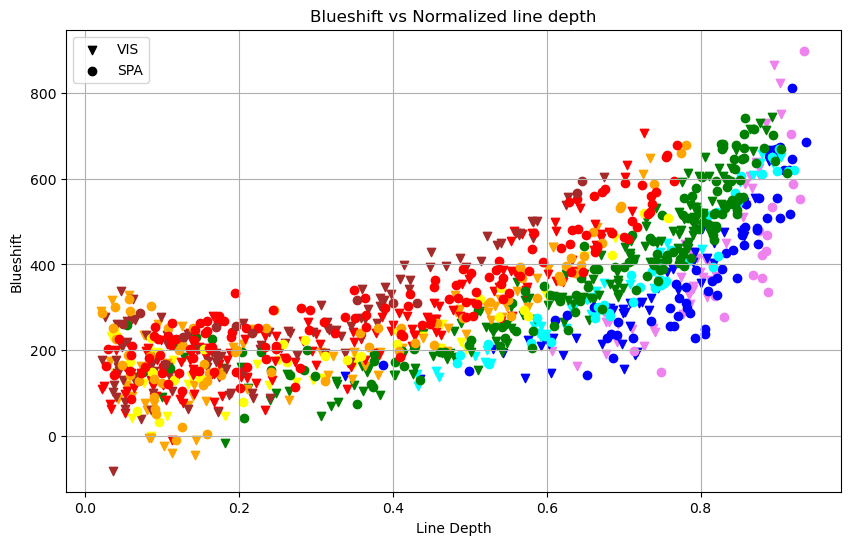

In [10]:
#Granulation pattern
fig8, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['Blueshift'], color=colors[i],marker='v')

for i in range(0,len(values_spatial)):  
    ax.scatter(1-values_spatial[i]['Flux'],values_spatial[i]['Blueshift'], color=colors[i],marker='o')

#For the legend
ax.scatter([],[],marker='v',color='k',label='VIS')
ax.scatter([],[],marker='o',color='k',label='SPA')

ax.set_title('Blueshift vs Normalized line depth')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.legend()
ax.grid()
# fig8.savefig('Blueshift.png')

Follow the characterization that made Ellwarth for both data I fit an second order polynomial fit.

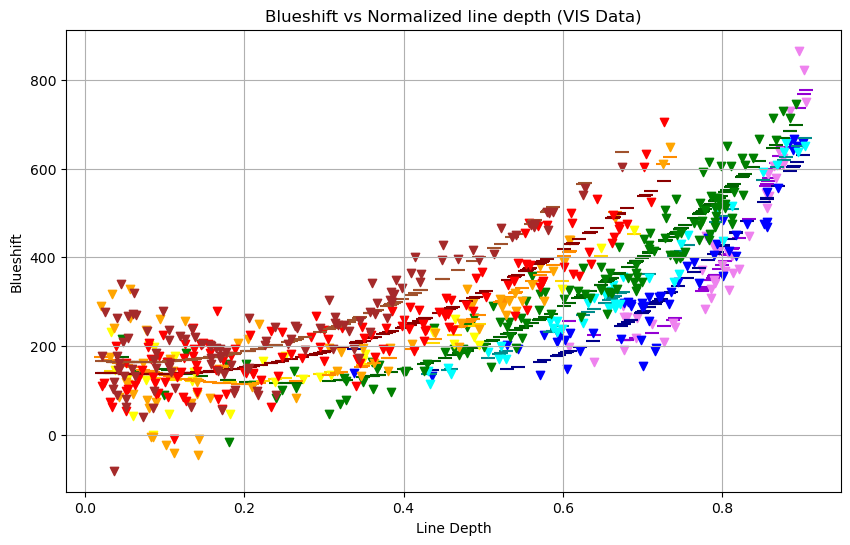

In [ ]:
#Values for the weigthed average
param_VIS = []
weigth_VIS = []
#Granulation pattern
fig9, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_VIS)):  
    
    pol = Polynomial.fit(1-values_VIS[i]['Flux'], values_VIS[i]['Blueshift'], 2)
    param = pol.convert().coef
    flux_fit = poly.polyval(1-values_VIS[i]['Flux'],param)

    ax.scatter(1-values_VIS[i]['Flux'],flux_fit, color=colors_fit[i],marker='_',s=100)
    ax.scatter(1-values_VIS[i]['Flux'],values_VIS[i]['Blueshift'], color=colors[i],marker='v')

    param_VIS.append(pd.DataFrame(param))
    weigth_VIS.append(len(values_VIS[i]['Flux']))

ax.set_title('Blueshift vs Normalized line depth (VIS Data)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig9.savefig('Characterization_VIS.png')

In [69]:
#Calculate te average and show the parameters
parameters_VIS = pd.concat(param_VIS,axis=1)
parameters_VIS = parameters_VIS.set_axis(colors, axis=1)

#Valor promedio de diferencia entre las pendientes
slope = np.average(parameters_VIS.iloc[0].values,weights=weigth_VIS)/len(colors)

#Valor promedio de los cortes
strength = np.average(parameters_VIS.iloc[2].values,weights=weigth_VIS)/len(colors)
parameters_VIS

,violet,blue,cyan,green,yellow,orange,red,brown
0,4924.205256,757.096602,263.343534,204.879875,155.980681,190.192763,142.964850,168.346633
1,-14022.706361,-2590.735673,-974.510908,-709.607005,-432.949509,-739.924830,-166.150359,-162.246893
2,10434.978277,2719.884050,1574.359799,1413.546014,1256.076020,1818.162629,1039.856131,1273.011937


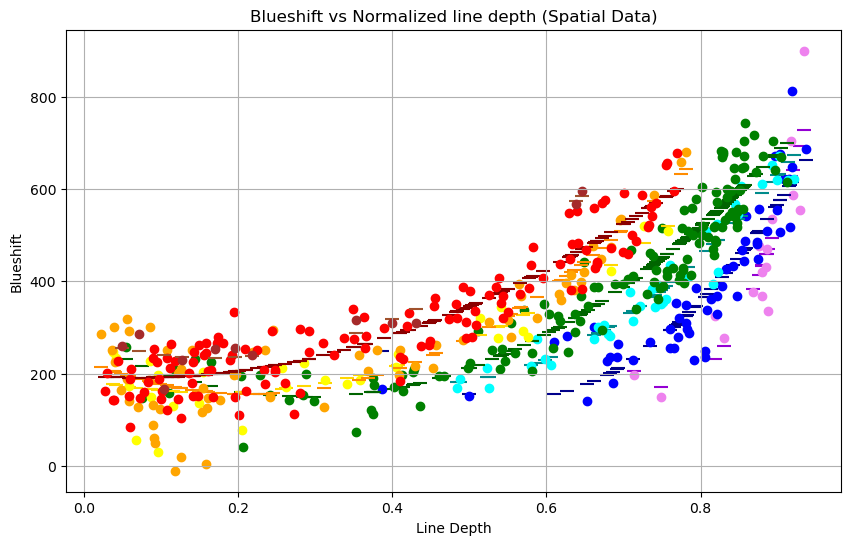

In [ ]:
#Values for the weigthed average
param_spatial = []
weigth_spatial = []

#Granulation pattern
fig9, ax = plt.subplots(1,1,figsize=(10,6))

for i in range(0,len(values_spatial)):  
    
    pol = Polynomial.fit(1-values_spatial[i]['Flux'], values_spatial[i]['Blueshift'], 2)
    param = pol.convert().coef
    flux_fit = poly.polyval(1-values_spatial[i]['Flux'],param)

    ax.scatter(1-values_spatial[i]['Flux'],flux_fit, color=colors_fit[i],marker='_',s=100)
    ax.scatter(1-values_spatial[i]['Flux'],values_spatial[i]['Blueshift'], color=colors[i],marker='o')

    param_spatial.append(pd.DataFrame(param))
    weigth_spatial.append(len(values_spatial[i]['Flux']))

ax.set_title('Blueshift vs Normalized line depth (Spatial Data)')
ax.set_xlabel(r'Line Depth')
ax.set_ylabel(r'Blueshift')
ax.grid()
# fig9.savefig('Characterization_SPA.png')

In [73]:
#Calculate te average and show the parameters
parameters_spatial = pd.concat(param_spatial,axis=1)
parameters_spatial = parameters_spatial.set_axis(colors, axis=1)

#Valor promedio de diferencia entre las pendientes
slope = np.average(parameters_spatial.iloc[0].values,weights=weigth_spatial)/len(colors)

#Valor promedio de los cortes
strength = np.average(parameters_spatial.iloc[2].values,weights=weigth_spatial)/len(colors)
parameters_spatial

,violet,blue,cyan,green,yellow,orange,red,brown
0,10599.620709,1254.213699,598.148587,272.301311,188.833536,228.526058,195.708702,276.610916
1,-27487.902370,-3986.754745,-1899.779770,-834.576136,-348.547495,-665.028627,-115.570313,-501.652587
2,18109.135055,3582.032288,2150.366536,1430.312726,1036.116392,1531.184313,833.207629,1511.339241
